Replot the data for Figure 4 (`figshort:entropy`) without taking logarithms.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from scipy.optimize import curve_fit

In [3]:
%matplotlib inline

In [4]:
data=pd.read_csv('conf.csv')
data

Unnamed: 0  sep_buffer  crowder_potential  v1000  areafrac_1000  \
0           0       5.750                0.0    0.0            1.0   
1           1       1.750                0.0    0.0            1.0   
2           2       1.000                0.0    0.0            1.0   
3           3       0.425                0.0    0.0            1.0   
4           4       0.300                0.0    0.0            1.0   
5           5       0.030                0.0    0.0            1.0   

   vol_domain_fenics  vol_domain_net  vol_pore_net  free_vol_fraction  \
0       14749.416777    14780.878145  12257.878145           0.995358   
1       14421.891843    14437.884488  11914.884488           0.967507   
2       14290.128924    14299.898534  11776.898534           0.956302   
3       13198.780733    13203.895813  10680.895813           0.867305   
4       13101.942078    13105.334418  10582.334418           0.859301   
5       10355.356491    10310.133234   7787.133234           0.632327   

   inclusion_count  area_1000  area_1001  totflux_A_1000  totflux_A_pore  \
0              7.0  49.790771        0.0        0.002288        0.000107   
1             94.0  49.790771        0.0        0.002225        0.000101   
2            129.0  49.790771        0.0        0.002197        0.000100   
3            407.0  52.146443        0.0        0.001971        0.000083   
4            432.0  50.517837        0.0        0.001956        0.000083   
5           1141.0  61.214578        0.0        0.001215        0.000048   

   totflux_B_1000  totflux_B_pore  pore_conc_A  pore_conc_B  
0       -0.002218        0.000877          NaN          NaN  
1       -0.002164        0.000852          NaN          NaN  
2       -0.002140        0.000842          NaN          NaN  
3       -0.001934        0.000748          NaN          NaN  
4       -0.001924        0.000743          NaN          NaN  
5       -0.001140        0.000458          NaN          NaN

In [5]:
phi=data['free_vol_fraction'].values
phi

array([0.995358, 0.967507, 0.956302, 0.867305, 0.859301, 0.632327])

In [6]:
sim=data['totflux_A_1000'].values
sim

array([0.00228826, 0.00222479, 0.00219662, 0.00197113, 0.00195639,
       0.00121521])

In [7]:
normsim=sim/sim[0]
normsim

array([1.        , 0.97226444, 0.95995404, 0.86140842, 0.85497079,
       0.53106442])

In [8]:
def fitfunc(phi,L):
  return phi**L

In [9]:
popt, pcov = curve_fit(fitfunc,phi,normsim,p0=[1])

In [10]:
popt

array([1.26047313])

In [11]:
pcov

array([[0.00571683]])

In [12]:
popt[0]

1.2604731334513297

In [13]:
L=popt[0]

In [14]:
analytical=np.array([p**L for p in phi])
analytical

array([0.99415243, 0.95921817, 0.94523675, 0.83573247, 0.82602262,
       0.56116735])

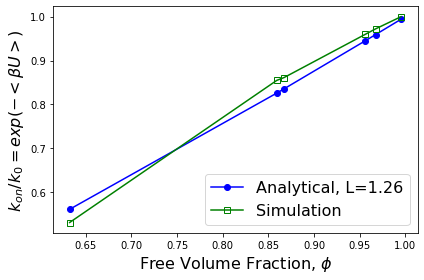

In [51]:
fig,ax=plt.subplots(1,1,figsize=(6,4))
o=ax.plot(phi,analytical,"bo-",label="Analytical, L={:0.2f}".format(L))
o=ax.plot(phi,normsim,"s-",label="Simulation",color="g",mfc="none")
o=ax.set_xlabel("Free Volume Fraction, $\phi$",fontsize=16)
o=ax.set_ylabel("$k_{on}/k_0=exp(-<\\beta U>)$",fontsize=16)
#o=ax.set_ylabel("$\\rho $",fontsize=10)
o=ax.legend(loc="lower right",fontsize=16)

fig.tight_layout()
#plt.rc('figure', figsize=(10, 5))
fig.savefig("k-ratio-vs-phi.png",dpi=300)

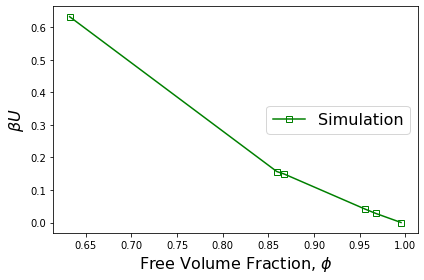

In [52]:
fig,ax=plt.subplots(1,1,figsize=(6,4))
#o=ax.plot(phi,analytical,"bo-",label="Analytical, L={:0.2f}".format(L))
o=ax.plot(phi,-np.log(normsim),"s-",label="Simulation",color="g",mfc="none")
o=ax.set_xlabel("Free Volume Fraction, $\phi$",fontsize=16)
o=ax.set_ylabel("$\\beta U$",fontsize=16)
#o=ax.set_ylabel("$\\rho $",fontsize=10)
o=ax.legend(loc="right",fontsize=16)

fig.tight_layout()
#plt.rc('figure', figsize=(10, 5))
fig.savefig("U-vs-phi.png",dpi=300)

In [53]:
cp *.png /Users/hadirahmaninejad/Desktop/.